In [185]:
import numpy as np
import pandas as pd
import re

In [186]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [187]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')
df.duplicated().sum()

122

In [188]:
df.head(1)
# Let's focus on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,sobha city,sector 108,3.95,16858.0,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


### 1. areaWithType

In [189]:
df.sample(5)[['price', 'area', 'areaWithType']]

,price,area,areaWithType
755,1.00,1100.0,Super Built up area 1100(102.19 sq.m.)
3424,0.72,1081.0,Super Built up area 1081(100.43 sq.m.)
28,4.25,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet area: 3156 sq.ft. (293.2 sq.m.)
2793,5.00,1467.0,Plot area 163(136.29 sq.m.)
1583,17.30,4466.0,Plot area 502(419.74 sq.m.)


In [190]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [191]:
# This function extracts the Built up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [192]:
# This function check if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639
    return area_value

In [193]:
# Extract Super Built up area and convert it to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [194]:
price_property_and_areas = ['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area',
                            'carpet_area']
df[price_property_and_areas].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2305,0.32,flat,476.0,Built Up area: 476 (44.22 sq.m.),NaN,476.0,NaN
3033,2.00,flat,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet area: 1950 sq.ft. (181.16 sq.m.),2400.0,NaN,1950.000000
2583,0.37,flat,554.0,Carpet area: 553.85 (51.45 sq.m.),NaN,NaN,553.802655
618,1.20,house,1072.0,Built Up area: 1072 (99.59 sq.m.),NaN,1072.0,NaN
3707,7.90,flat,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area: 2900 sq.ft. (269.42 sq.m.),NaN,3950.0,2900.000000


In [195]:
print(df.isnull().sum())

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64


In [196]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | df['carpet_area'].isnull())][
    price_property_and_areas].shape

(534, 7)

In [197]:
df[df['areaWithType'].str.contains('Plot')][price_property_and_areas].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
18,NaN,house,NaN,Plot area 250(209.03 sq.m.)Built Up area: 260 sq.yards (217.39 sq.m.)Carpet area: 245 sq.yards (204.85 sq.m.),NaN,260.0,245.0
21,0.65,house,585.0,Plot area 65(54.35 sq.m.),NaN,NaN,NaN
22,10.50,house,2430.0,Plot area 302(252.51 sq.m.)Built Up area: 300 sq.yards (250.84 sq.m.)Carpet area: 270 sq.yards (225.75 sq.m.),NaN,300.0,270.0
25,20.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
26,15.50,house,5490.0,Plot area 610(510.04 sq.m.),NaN,NaN,NaN


In [198]:
print(df.isnull().sum())

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64


In [199]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][
    price_property_and_areas]
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
21,0.65,house,585.0,Plot area 65(54.35 sq.m.),NaN,NaN,NaN
25,20.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
26,15.50,house,5490.0,Plot area 610(510.04 sq.m.),NaN,NaN,NaN
38,9.90,house,3375.0,Plot area 375(313.55 sq.m.),NaN,NaN,NaN
40,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN


In [200]:
all_nan_index = all_nan_df.index

In [201]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [202]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
21,0.65,house,585.0,Plot area 65(54.35 sq.m.),NaN,65.00,NaN
25,20.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
26,15.50,house,5490.0,Plot area 610(510.04 sq.m.),NaN,610.00,NaN
38,9.90,house,3375.0,Plot area 375(313.55 sq.m.),NaN,375.00,NaN
40,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
54,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
55,13.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
58,NaN,house,NaN,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
61,4.60,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
64,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN


In [203]:
# Update the original dataframe
df.update(all_nan_df)

df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [204]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,sobha city,sector 108,3.95,16858.0,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05
1,house,ansal api esencia,sector 67,1.85,74000.0,250.0,Carpet area: 250 (23.23 sq.m.),3,3,3,not available,1.0,NaN,undefined,"['Proposed Metro corridor', 'N.H-8', 'Golf Course Road', 'Shiskshantar', 'DPS', 'Amity', 'Pathways', 'GD Goenka', 'Medicity', 'Artemis', 'Max, Fortis', 'Apollo']",NaN,NaN,NaN,NaN,250.00
2,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,0,not available,1.0,NaN,undefined,"['Sector 54 chowk metro station', 'Sector 53-54 metro station', 'Sector metro station', 'Sector metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Paras Hospital Gurgaon', 'pracksht hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', 'Hdfc bank and atm', '222', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Pizza Hut', 'Suncity School', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'IILM']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,270.0,NaN
3,flat,signature global park,sohna road,0.79,7308.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3+,not available,4.0,NaN,Under Construction,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1081.0,NaN,NaN
4,flat,m3m skywalk,sector 74,2.20,10901.0,2018.0,Super Built up area 2018(187.48 sq.m.),3,3,3,study room,12.0,NaN,0 to 1 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Cel

### 2. additionalRoom

In [205]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [206]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']
df['additionalRoom'].head()

0     servant room
1    not available
2    not available
3    not available
4       study room
Name: additionalRoom, dtype: object

In [207]:
df['additionalRoom'].str.contains(new_cols[1])

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12       True
13      False
14      False
15       True
16      False
17       True
18       True
19       True
20       True
21      False
22       True
23      False
24      False
25       True
26       True
27      False
28       True
29      False
30       True
31       True
32      False
33       True
34      False
35      False
36      False
37       True
38      False
39       True
40       True
41      False
42       True
43       True
44       True
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54       True
55       True
56      False
57      False
58      False
59      False
60      False
61       True
62      False
63       True
64       True
65       True
66      False
67      False
68      False
69       True
70      False
71    

In [208]:
# populate the new columns based on the 'additionalRoom' column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [209]:
df.sample(5)[['additionalRoom', 'study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1368,servant room,0,1,0,0,0
2671,not available,0,0,0,0,0
648,servant room,0,1,0,0,0
3230,servant room,0,1,0,0,0
1043,servant room,0,1,0,0,0


In [210]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,sobha city,sector 108,3.95,16858.0,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0
1,house,ansal api esencia,sector 67,1.85,74000.0,250.0,Carpet area: 250 (23.23 sq.m.),3,3,3,not available,1.0,NaN,undefined,"['Proposed Metro corridor', 'N.H-8', 'Golf Course Road', 'Shiskshantar', 'DPS', 'Amity', 'Pathways', 'GD Goenka', 'Medicity', 'Artemis', 'Max, Fortis', 'Apollo']",NaN,NaN,NaN,NaN,250.00,0,0,0,0,0
2,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,0,not available,1.0,NaN,undefined,"['Sector 54 chowk metro station', 'Sector 53-54 metro station', 'Sector metro station', 'Sector metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Paras Hospital Gurgaon', 'pracksht hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', 'Hdfc bank and atm', '222', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Pizza Hut', 'Suncity School', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'IILM']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,270.0,NaN,0,0,0,0,0
3,flat,signature global park,sohna road,0.79,7308.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3+,not available,4.0,NaN,Under Construction,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1081.0,NaN,NaN,0,0,0,0,0
4,flat,m3m skywalk,sector 74,2.20,10901.0,2018.0,Super Built up area 20

#### 3. agePossession

In [211]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old        1676
5 to 10 Year Old        575
0 to 1 Year Old         530
undefined               332
10+ Year Old            310
Under Construction       90
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      20
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      15
2024-03-01 00:00:00      14
2023-08-01 00:00:00       7
2024-01-01 00:00:00       7
2024-10-01 00:00:00       7
2025-12-01 00:00:00       7
2023-11-01 00:00:00       5
2024-06-01 00:00:00       5
2023-09-01 00:00:00       4
2024-08-01 00:00:00       4
By 2025                   4
2024-07-01 00:00:00       4
2023-10-01 00:00:00       3
2024-02-01 00:00:00       3
2024-05-01 00:00:00       3
2024-11-01 00:00:00       3
2025-01-01 00:00:00       3
2026-01-01 00:00:00       2
2026-04-01 00:00:00       2
Dec 2023                  2
By 2027                   2
2027-07-01 00:00:00       2
Jun 2024                  2
2025-03-01 00:00:00       2
2026-1

In [212]:
def categorize_age_possession(value):
    if pd.isna(value):
        return 'Undefined'
    if '0 to 1 Year Old' in value or 'Within 6 months' in value or 'Within 3 months' in value:
        return 'New Property'
    if '1 to 5 Year Old' in value:
        return 'Relatively New'
    if '5 to 10 Year Old' in value:
        return 'Moderately Old'
    if '10+ Year Old' in value:
        return 'Old Property'
    if 'Under Construction' in value or 'By' in value:
        return 'Under Construction'
    try:
        # For entries like 'May 2024'
        int(value.split(' ')[-1])
        return 'Under Construction'
    except:
        return 'Undefined'

In [213]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              476
Old Property           310
Under Construction     140
Name: count, dtype: int64

In [214]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,sobha city,sector 108,3.95,16858.0,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0
1,house,ansal api esencia,sector 67,1.85,74000.0,250.0,Carpet area: 250 (23.23 sq.m.),3,3,3,not available,1.0,NaN,Undefined,"['Proposed Metro corridor', 'N.H-8', 'Golf Course Road', 'Shiskshantar', 'DPS', 'Amity', 'Pathways', 'GD Goenka', 'Medicity', 'Artemis', 'Max, Fortis', 'Apollo']",NaN,NaN,NaN,NaN,250.00,0,0,0,0,0
2,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,0,not available,1.0,NaN,Undefined,"['Sector 54 chowk metro station', 'Sector 53-54 metro station', 'Sector metro station', 'Sector metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Paras Hospital Gurgaon', 'pracksht hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', 'Hdfc bank and atm', '222', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Pizza Hut', 'Suncity School', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'IILM']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,270.0,NaN,0,0,0,0,0
3,flat,signature global park,sohna road,0.79,7308.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3+,not available,4.0,NaN,Under Construction,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1081.0,NaN,NaN,0,0,0,0,0
4,flat,m3m skywalk,sector 74,2.20,10901.0,2018.0,Super Built up area 2018(

#### 4. furnishDetails

In [215]:
df.sample(5)[['furnishDetails', 'features']]

,furnishDetails,features
304,NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3413,[],"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
2445,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"
1486,NaN,NaN
130,"['5 Fan', '2 Geyser', '5 Light', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [216]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []

for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)

unique_furnishings = list(set(all_furnishings))


# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0


# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishing_df = df[['furnishDetails'] + columns_to_include]

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\15105\AppData\Local\Temp\ipykernel_19820\1741040517.py:15: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [217]:
furnishing_df.shape

(3803, 19)

In [218]:
furnishing_df.drop(columns=['furnishDetails'], inplace=True)
furnishing_df.sample(5)

C:\Users\15105\AppData\Local\Temp\ipykernel_19820\3176323780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishing_df.drop(columns=['furnishDetails'], inplace=True)


,Chimney,Fridge,Bed,Wardrobe,Microwave,Exhaust Fan,Water Purifier,TV,Fan,Light,Geyser,Sofa,Dining Table,Washing Machine,Stove,AC,Modular Kitchen,Curtains
465,1,0,0,3,0,1,0,0,6,12,2,0,0,0,0,0,1,0
410,1,1,0,5,1,1,1,0,10,16,4,0,0,1,1,10,1,0
2156,1,0,0,4,0,1,0,0,5,15,4,0,0,0,1,5,1,1
1627,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1018,1,0,0,1,0,1,0,0,1,1,1,0,0,0,1,1,1,1


In [219]:
# Applying K-means clustering and reducing the columns into categories
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishing_df)

In [220]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

In [221]:
wcss_reduced

[68454.00000000033,
 51949.787310996355,
 41893.08390949949,
 38355.475714314074,
 36320.32840336233,
 34672.81398333397,
 33402.60674412368,
 30023.459265793892,
 28296.49167405641,
 27761.507508567614]

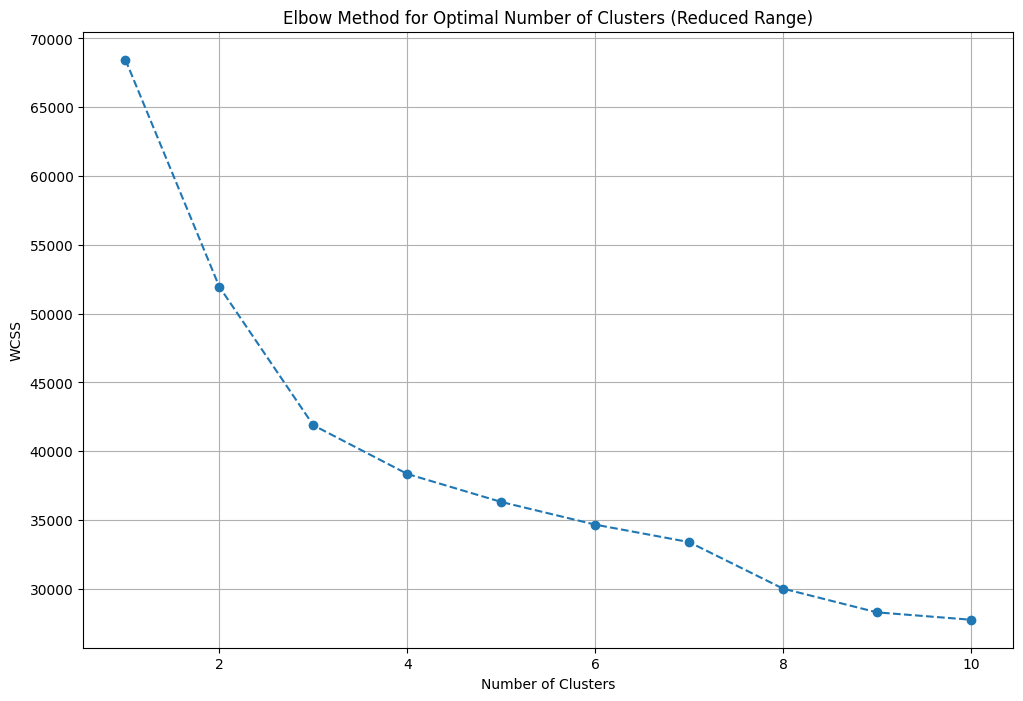

In [222]:
# Plot the result
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

`As you can notice there is no significant drop after 3 clusters`

In [223]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [224]:
df = df.iloc[:, :-18]
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,sobha city,sector 108,3.95,16858.0,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0
1,house,ansal api esencia,sector 67,1.85,74000.0,250.0,Carpet area: 250 (23.23 sq.m.),3,3,3,not available,1.0,NaN,Undefined,"['Proposed Metro corridor', 'N.H-8', 'Golf Course Road', 'Shiskshantar', 'DPS', 'Amity', 'Pathways', 'GD Goenka', 'Medicity', 'Artemis', 'Max, Fortis', 'Apollo']",NaN,NaN,NaN,NaN,250.00,0,0,0,0,0
2,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,0,not available,1.0,NaN,Undefined,"['Sector 54 chowk metro station', 'Sector 53-54 metro station', 'Sector metro station', 'Sector metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Paras Hospital Gurgaon', 'pracksht hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', 'Hdfc bank and atm', '222', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Pizza Hut', 'Suncity School', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'IILM']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,270.0,NaN,0,0,0,0,0
3,flat,signature global park,sohna road,0.79,7308.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3+,not available,4.0,NaN,Under Construction,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1081.0,NaN,NaN,0,0,0,0,0
4,flat,m3m skywalk,sector 74,2.20,10901.0,2018.0,Super Built up area 2018(

In [225]:
df['furnishing_type'] = cluster_assignments

In [226]:
df.sample(5)[['furnishDetails', 'furnishing_type']]

,furnishDetails,furnishing_type
1029,"['3 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",2
1159,"['3 Fan', '1 Exhaust Fan', '1 Geyser', '11 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3776,NaN,1
3058,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
1841,"['4 Wardrobe', '6 Fan', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


`Above` 

0 -> `Unfurnished`

1 -> `Semi-furnished`

2 -> `Furnished`

### 5. features

In [227]:
df[['society', 'features']].sample(5)

,society,features
3189,corona optus,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2038,ambience creacions,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1293,tarc maceo,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
774,signature global synera,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2141,independent,NaN


In [228]:
df['features'].isnull().sum()

635

In [229]:
app_df = pd.read_csv('apartments.csv')
app_df.head(3)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"


In [230]:
# to make it consistent with the df data we have 
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [231]:
# We are going to populate the null values of df from apartments_df
temp_df = df[df['features'].isnull()]
temp_df.shape

(635, 26)

In [232]:
# Left joining and considering only TopFacilities
# society column is same as PropertyName
x = temp_df.merge(app_df, left_on='society', right_on='PropertyName', how='left')['TopFacilities']
df.loc[temp_df.index, 'features'] = x.values
df['features'].isnull().sum()

481

`We were only able to populate 154 rows`

In [233]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list
0,flat,sobha city,sector 108,3.95,16858.0,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0,1,"[Power Back-up, Intercom Facility, Lift(s), Centrally Air Conditioned, Water purifier, High Ceiling Height, Separate entry for servant room, No open drainage around, Recently Renovated, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]"
1,house,ansal api esencia,sector 67,1.85,74000.0,250.0,Carpet area: 250 (23.23 sq.m.),3,3,3,not available,1.0,NaN,Undefined,"['Proposed Metro corridor', 'N.H-8', 'Golf Course Road', 'Shiskshantar', 'DPS', 'Amity', 'Pathways', 'GD Goenka', 'Medicity', 'Artemis', 'Max, Fortis', 'Apollo']",NaN,"['Swimming Pool', 'Laundry', 'School', 'Solar Lighting', 'Terrace Garden', 'Creche/Day care', 'Grocery Shop', 'Shopping Centre', 'Video Door Security']",NaN,NaN,250.00,0,0,0,0,0,1,"[Swimming Pool, Laundry, School, Solar Lighting, Terrace Garden, Creche/Day care, Grocery Shop, Shopping Centre, Video Door Security]"
2,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,0,not available,1.0,NaN,Undefined,"['Sector 54 chowk metro station', 'Sector 53-54 metro station', 'Sector metro station', 'Sector metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Paras Hospital Gurgaon', 'pracksht hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', 'Hdfc bank and atm', '222', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Pizza Hut', 'Suncity School', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'IILM']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Swimming Pool', 'ATM', 'Creche/Day care', 'Wi-Fi Connectivity', 'Cafeteria', 'Community Hall', 'Entrance Lobb

In [234]:
# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [236]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [239]:
features_binary_df.shape

(3803, 130)

In [240]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

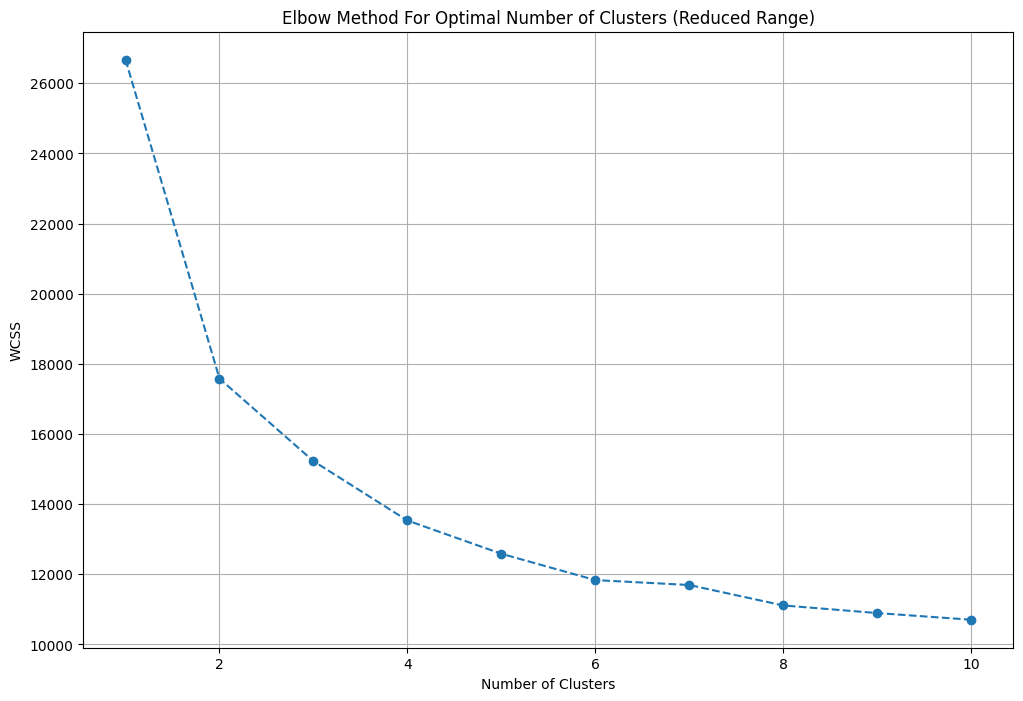

In [242]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

`Since the number of clusters we are getting are 2, luxury and budget. Where budget row is basically NaN values and the rest are classified as Luxury. This idea of applying KMeans clustering has failed because we want atleast 3 where categories are like Luxury, Semi-Luxury, and Budget`

`Now our focus is to create a Luxury_score which will be a numeric col rather than a categorical col`

In [243]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury_score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [244]:
luxury_score

0       118
1        49
2        46
3       109
4        15
5        15
6        49
7       159
8        88
9       107
10      174
11       51
12       49
13       72
14       54
15      104
16       49
17      120
18      144
19       49
20       79
21        0
22       72
23      103
24      134
25       97
26       76
27      174
28      143
29       88
30      156
31       65
32        0
33       95
34      142
35       49
36       59
37       49
38      106
39       67
40       31
41       51
42      174
43      165
44      113
45       49
46       51
47      156
48       60
49        0
50       42
51        0
52       45
53       57
54       43
55      110
56       49
57        0
58        0
59        0
60       15
61       96
62        0
63      167
64       49
65       49
66       38
67        0
68       44
69      117
70        0
71       15
72       44
73       46
74       91
75       49
76       83
77       49
78      174
79       92
80      142
81        0
82      105
83  

In [245]:
df['luxury_score'] = luxury_score
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0,1,"[Power Back-up, Intercom Facility, Lift(s), Centrally Air Conditioned, Water purifier, High Ceiling Height, Separate entry for servant room, No open drainage around, Recently Renovated, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",118
1,house,ansal api esencia,sector 67,1.85,74000.0,250.0,Carpet area: 250 (23.23 sq.m.),3,3,3,not available,1.0,NaN,Undefined,"['Proposed Metro corridor', 'N.H-8', 'Golf Course Road', 'Shiskshantar', 'DPS', 'Amity', 'Pathways', 'GD Goenka', 'Medicity', 'Artemis', 'Max, Fortis', 'Apollo']",NaN,"['Swimming Pool', 'Laundry', 'School', 'Solar Lighting', 'Terrace Garden', 'Creche/Day care', 'Grocery Shop', 'Shopping Centre', 'Video Door Security']",NaN,NaN,250.00,0,0,0,0,0,1,"[Swimming Pool, Laundry, School, Solar Lighting, Terrace Garden, Creche/Day care, Grocery Shop, Shopping Centre, Video Door Security]",49
2,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,0,not available,1.0,NaN,Undefined,"['Sector 54 chowk metro station', 'Sector 53-54 metro station', 'Sector metro station', 'Sector metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Paras Hospital Gurgaon', 'pracksht hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', 'Hdfc bank and atm', '222', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Pizza Hut', 'Suncity School', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'IILM']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Swimming Pool', 'ATM', 'Creche/Day care', 'Wi-Fi Connectivity', 'Cafeteria', 'Community H

In [246]:
# Columns to drop -> nearbyLocations, furnishDetails, features, features_lust, additionalRoom
df.drop(columns=['nearbyLocations', 'furnishDetails', 'features', 'features_list', 'additionalRoom'], inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
382,flat,sare crescent parc royal greens phase 1,sector 92,0.65,4512.0,1441.0,Super Built up area 1440.45(133.82 sq.m.),3,3,3,1.0,East,Moderately Old,1440.45,NaN,NaN,0,0,0,0,0,1,91
2695,flat,spaze privvy the address,sector 93,1.45,8033.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,4,2,12.0,North-East,Relatively New,1805.00,1350.0,1100.0,0,0,0,0,0,2,96
1958,flat,apna enclave,sector 3,0.80,6153.0,1300.0,Super Built up area 1300(120.77 sq.m.)Built Up area: 1000 sq.ft. (92.9 sq.m.),3,3,1,0.0,NaN,Old Property,1300.00,1000.0,NaN,0,0,0,0,0,1,0
3087,flat,essel tower,sector 28,2.20,12500.0,1760.0,Carpet area: 1760 (163.51 sq.m.),3,4,3+,3.0,NaN,Moderately Old,NaN,NaN,1760.0,0,1,0,0,0,0,0
1473,flat,m3m golfestate,sector 65,5.50,16959.0,3243.0,Super Built up area 3243(301.28 sq.m.)Built Up area: 2803 sq.ft. (260.41 sq.m.)Carpet area: 2388 sq.ft. (221.85 sq.m.),3,4,3,3.0,North-East,Relatively New,3243.00,2803.0,2388.0,0,1,0,0,0,1,49


In [247]:
df.shape

(3803, 23)

In [248]:
df.to_csv('gurgaon_properties_cleaned_v2.csv', index=False)